In [50]:
import torch as th
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
SAVE_PATH = './saved_models/'

exp_name = 'exp0'
# exp_name = 'exp_srv27'
save_path = SAVE_PATH+exp_name+'/'
losses = th.load(save_path+'losses.pth')

In [66]:
l1 = losses[0]['pr']['train']
# l2 = losses[0]['pr']['train']

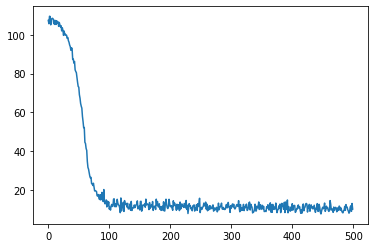

In [62]:
plt.plot(l1, )
# plt.ylim((0,29))
# plt.xlim((100,500))